# Obtención y preparación de datos

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

boston = load_boston()

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target[df.index]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Volvamos a revisar el modelo obtenido usando la regresión lineal

Tamaño del conjunto de datos:  506
Tamaño del conjunto de entrenamiento:  404
Tamaño del conjunto de prueba:  102


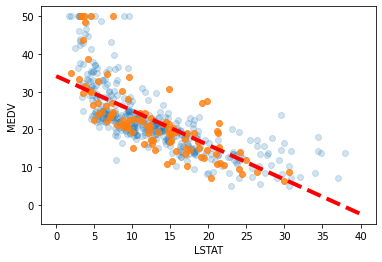

Entrenamiento 0.542497603066411
Prueba 0.5453164888101072


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x = df["LSTAT"].values.reshape(-1,1)
y = df["MEDV"].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.20, random_state=100)

print("Tamaño del conjunto de datos: ", x.size)
print("Tamaño del conjunto de entrenamiento: ", x_train.size)
print("Tamaño del conjunto de prueba: ", x_test.size)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train,y_train)
y_train_predict = reg.predict(x_train)
y_test_predict = reg.predict(x_test)

x_plot = np.linspace(0,40).reshape(-1, 1)
y_plot = reg.predict(x_plot)

plt.scatter(x_train, y_train, alpha = 0.2)
plt.scatter(x_test, y_test, alpha = 0.8)
plt.plot(x_plot, y_plot,"r--", lw = 4)

plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

print("Entrenamiento", r2_score(y_train, y_train_predict))
print("Prueba", r2_score(y_test, y_test_predict))

# Primer acercamiento a la Regresión Polinomial

## Regresión Cuadrática

In [3]:
x = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)
reg = LinearRegression().fit(x_poly, y)
y_predict = reg.predict(x_poly)

In [6]:
x_model = np.linspace(0,40).reshape(-1, 1)
y_model = reg.predict(poly.transform(x_model.reshape(-1,1)))

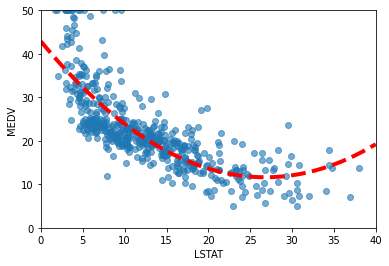

In [7]:
plt.scatter(x, y, alpha = 0.6)
plt.plot(x_model, y_model, "--r", lw = 4)

plt.axis([0, 40, 0, 50])
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

plt.show()

In [8]:
print("R2_score:", r2_score(y, y_predict))
print()

R2_score: 0.6407168971636611



$ F(x) = a x^2 + b x + c $

In [9]:
reg.coef_

array([[ 0.        , -2.3328211 ,  0.04354689]])

In [10]:
a = reg.coef_[0][2]
a

0.04354688935822203

In [11]:
b = reg.coef_[0][1]
b

-2.3328210982827304

In [12]:
reg.intercept_

array([42.86200733])

In [13]:
c = reg.intercept_[0]
c

42.86200732816938

In [14]:
x_propuesta = 30
y_obtenida = a * x_propuesta * x_propuesta + b * x_propuesta + c
print(y_obtenida)

12.069574802087288


$ F(x) = 0.043546889358 x^2 -2.33282109828x + 42.862007328 $

In [15]:
x_poly = poly.fit_transform([[x_propuesta]])
y_obtenida = reg.predict(x_poly)
print(y_obtenida)

[[12.0695748]]


<b>Actualización 2022:</b>
<br>
<br>Se modifica el parametro que recibe la función <b>poly.fit_transform(x_propuesta)</b> por el mismo parametro pero dentro de un doble parentesis cuadrado. Puesto que ahora la función necesita recibir un arreglo de dos dimensiones.
<br>
<br>Quedando de la siguiente manera: <b>poly.fit_transform([[x_propuesta]])</b>

## Regresión Cúbica

In [16]:
x = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

In [17]:
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x)
reg = LinearRegression().fit(x_poly, y)
y_predict = reg.predict(x_poly)

In [18]:
x_model = np.linspace(0,40).reshape(-1, 1)
y_model = reg.predict(poly.transform(x_model.reshape(-1,1)))

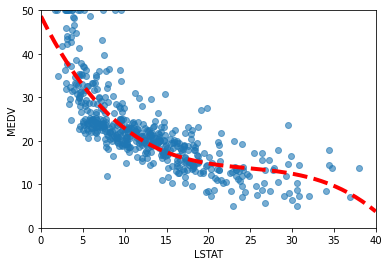

In [19]:
plt.scatter(x, y, alpha = 0.6)
plt.plot(x_model, y_model, "--r", lw = 4)

plt.axis([0, 40, 0, 50])
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

plt.show()

In [20]:
print("R2_score:", r2_score(y, y_predict))
print()

R2_score: 0.6578476405895719



$ F(x) = ax^3+bx^2+cx+d $

In [21]:
reg.coef_

array([[ 0.00000000e+00, -3.86559278e+00,  1.48738477e-01,
        -2.00386767e-03]])

In [22]:
a = reg.coef_[0][3]
a

-0.0020038676661026265

In [23]:
b = reg.coef_[0][2]
b

0.14873847663616893

In [24]:
c = reg.coef_[0][1]
c

-3.865592778816217

In [25]:
d = reg.intercept_[0]
d

48.649625341566605

In [26]:
x_ = 30
y_obtenida = a * x_ * x_ * x_ + b * x_ * x_  + c * x_  + d
print(y_obtenida)

12.442043964861185


$ F(x) = -0.0020038676661x^3+0.148738476x^2-3.86559277881x+48.6496253415 $

In [27]:
x_poly = poly.fit_transform([[x_]])
y_obtenida = reg.predict(x_poly)
print(y_obtenida)

[[12.44204396]]


<b>Actualización 2022:</b>
<br>
<br>Se modifica el parametro que recibe la función <b>poly.fit_transform(x_)</b> por el mismo parametro pero dentro de un doble parentesis cuadrado. Puesto que ahora la función necesita recibir un arreglo de dos dimensiones.
<br>
<br>Quedando de la siguiente manera: <b>poly.fit_transform([[x_]])</b>

## Un buen habito como programador es reutilizar código y crear funciones.

In [28]:
def plotModel(degree = 1):
    
    global y_predict, poly, reg, x_model, x, y
    
    poly = PolynomialFeatures(degree = degree)
    x_poly = poly.fit_transform(x)
    reg = LinearRegression().fit(x_poly, y)
    y_predict = reg.predict(x_poly)
    
    plt.scatter(x, y, alpha = 0.6)
    
    x_model = np.linspace(0,40).reshape(-1, 1)
    y_model = reg.predict(poly.transform(x_model.reshape(-1,1)))
    plt.plot(x_model, y_model,"--r", lw = 4)
    
    plt.axis([0, 40, 0, 50])
    plt.xlabel("LSTAT")
    plt.ylabel("MEDV")
    
    plt.show()
    
    print("R2_score:", r2_score(y, y_predict))
    print()

In [29]:
x = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

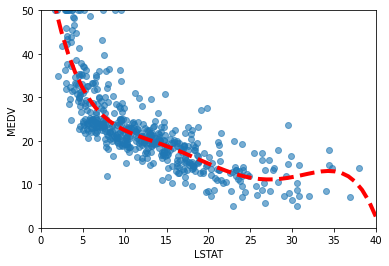

R2_score: 0.6816897416931836



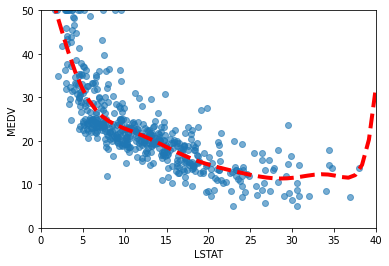

R2_score: 0.6845246355812318



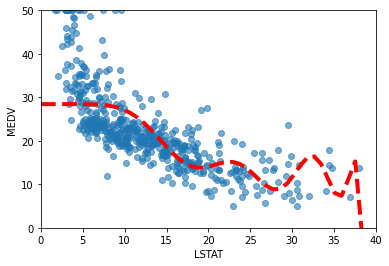

R2_score: 0.4644381789559283



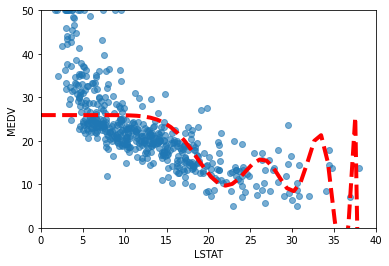

R2_score: 0.33856531428884706



In [30]:
plotModel(5)
plotModel(10)
plotModel(15)
plotModel(20)

# Hagamos nuestro modelo de Regresión Polinomial usando ipywidgets

In [31]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

x = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)
    
interact(plotModel, degree = (1, 20));

interactive(children=(IntSlider(value=1, description='degree', max=20, min=1), Output()), _dom_classes=('widge…

# Validando nuestros modelos usando: Train-Test Split

In [32]:
def plotTrainTestModel(degree = 1, test_size = 0.20):

    global y_predict, poly, reg, x_model, x, y 
           
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size = test_size, random_state=100)
    
    poly = PolynomialFeatures(degree = degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    reg = LinearRegression().fit(x_train_poly, y_train)
    
    y_train_predict = reg.predict(x_train_poly)
    y_test_predict = reg.predict(x_test_poly)
    
    plt.scatter(x_train, y_train, alpha = 0.2)
    plt.scatter(x_test, y_test, alpha = 0.8)
    
    x_model = np.linspace(0,40).reshape(-1, 1)
    y_model = reg.predict(poly.transform(x_model.reshape(-1,1)))
    plt.plot(x_model, y_model, "--r", lw = 4)
    
    plt.axis([0, 40, 0, 50])
    plt.xlabel("LSTAT")
    plt.ylabel("MEDV")
    
    plt.show()
    
    print("Porcentaje de Entrenamiento: ", 1 - test_size)
    print("Porcentaje de Prueba: ", test_size)
    print("Entrenamiento", r2_score(y_train, y_train_predict))
    print("Prueba", r2_score(y_test, y_test_predict))
    print()

In [33]:
x = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

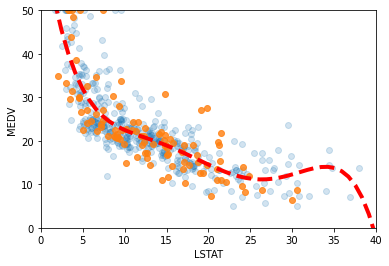

Porcentaje de Entrenamiento:  0.8
Porcentaje de Prueba:  0.2
Entrenamiento 0.6931347281704789
Prueba 0.640458224711923



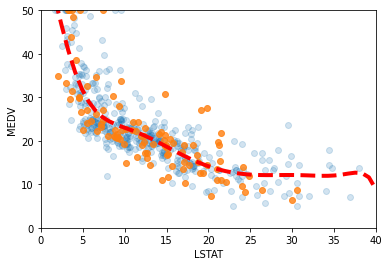

Porcentaje de Entrenamiento:  0.8
Porcentaje de Prueba:  0.2
Entrenamiento 0.6975030415426201
Prueba 0.6358336414474377



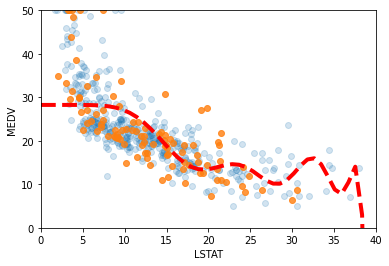

Porcentaje de Entrenamiento:  0.8
Porcentaje de Prueba:  0.2
Entrenamiento 0.4713054675811116
Prueba 0.4356535910785827



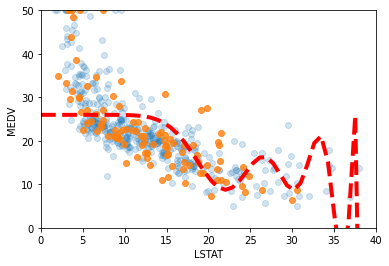

Porcentaje de Entrenamiento:  0.8
Porcentaje de Prueba:  0.2
Entrenamiento 0.3559584341555092
Prueba 0.2749978637433521



In [34]:
plotTrainTestModel(5)
plotTrainTestModel(10)
plotTrainTestModel(15)
plotTrainTestModel(20)

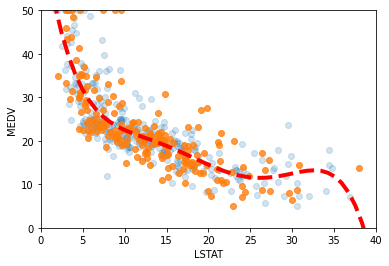

Porcentaje de Entrenamiento:  0.6
Porcentaje de Prueba:  0.4
Entrenamiento 0.7091683627885095
Prueba 0.6411550539137475



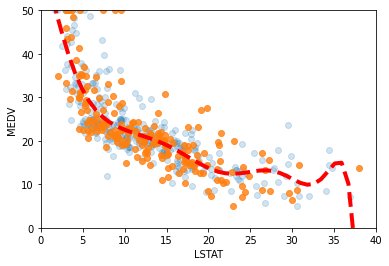

Porcentaje de Entrenamiento:  0.6
Porcentaje de Prueba:  0.4
Entrenamiento 0.7125902583679644
Prueba 0.5836075351895808



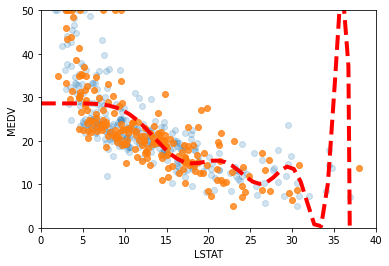

Porcentaje de Entrenamiento:  0.6
Porcentaje de Prueba:  0.4
Entrenamiento 0.5008539299225251
Prueba -8.585464961576623



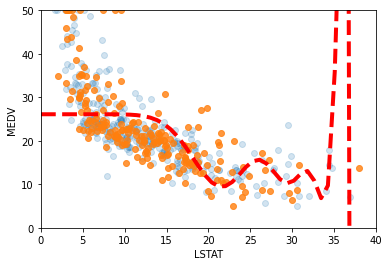

Porcentaje de Entrenamiento:  0.6
Porcentaje de Prueba:  0.4
Entrenamiento 0.3758244154292577
Prueba -83.55239199752184



In [35]:
plotTrainTestModel(5, 0.40)
plotTrainTestModel(10, 0.40)
plotTrainTestModel(15, 0.40)
plotTrainTestModel(20, 0.40)

In [36]:
interact(plotTrainTestModel, degree = (1, 20), test_size = (0.20, 0.90));

interactive(children=(IntSlider(value=1, description='degree', max=20, min=1), FloatSlider(value=0.2, descript…

# Validando nuestros modelos usando: Cross Validation

In [37]:
from sklearn.model_selection import KFold

def plotCrossValidationModel(degree = 1, showGraph = True, k_ = 4):

    global y_predict, poly, reg, x_model, x, y 
    data = df[["LSTAT","MEDV"]]
    
    k = k_
    kfold = KFold(k, True, 103)
    r2_train_avg, r2_test_avg = 0, 0
    
    for train, test in kfold.split(data):
        
        x_train = data.iloc[train]["LSTAT"].values.reshape(-1,1)
        y_train = data.iloc[train]["MEDV"]
        x_test = data.iloc[test]["LSTAT"].values.reshape(-1,1)
        y_test = data.iloc[test]["MEDV"]
    
        poly = PolynomialFeatures(degree = degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        reg = LinearRegression().fit(x_train_poly, y_train)
    
        y_train_predict = reg.predict(x_train_poly)
        y_test_predict = reg.predict(x_test_poly)
    
        x_model = np.linspace(0,40).reshape(-1, 1)
        y_model = reg.predict(poly.transform(x_model.reshape(-1,1)))
    
        r2_train = r2_score(y_train, y_train_predict)
        r2_test = r2_score(y_test, y_test_predict)
              
        r2_train_avg += r2_train
        r2_test_avg += r2_test
    
        if(showGraph):
            
            plt.scatter(x_train, y_train, alpha = 0.2)
            plt.scatter(x_test, y_test, alpha = 0.8)
            plt.plot(x_model, y_model, "--r", lw = 4)

            plt.axis([0, 40, 0, 50])
            plt.xlabel("LSTAT")
            plt.ylabel("MEDV")

            plt.show()

            print("Entrenamiento = ", r2_train)
            print("Prueba = ", r2_test)
    
    print()
    print("Entrenamiento promedio =", r2_train_avg/k)
    print("Prueba promedio =", r2_test_avg/k)
    print()

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=103 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


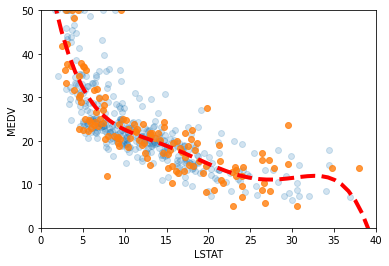

Entrenamiento =  0.6769347649683333
Prueba =  0.6864508171032628


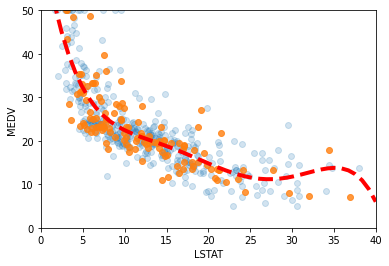

Entrenamiento =  0.6890969246986015
Prueba =  0.6529696259189051


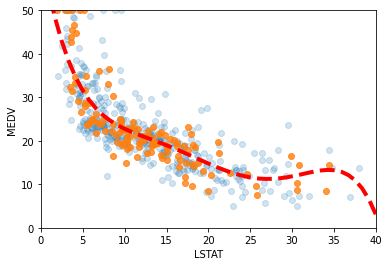

Entrenamiento =  0.6520505223627133
Prueba =  0.750690516248641


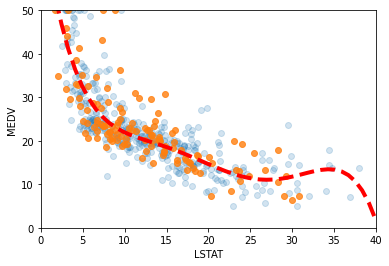

Entrenamiento =  0.7119071174325382
Prueba =  0.5720122897898033

Entrenamiento promedio = 0.6824973323655465
Prueba promedio = 0.665530812265153



In [38]:
plotCrossValidationModel(5)

In [39]:
plotCrossValidationModel(5, False)
plotCrossValidationModel(10, False)
plotCrossValidationModel(15, False)
plotCrossValidationModel(20, False)


Entrenamiento promedio = 0.6824973323655465
Prueba promedio = 0.665530812265153


Entrenamiento promedio = 0.6861332774580371
Prueba promedio = 0.6458872336560151


Entrenamiento promedio = 0.4756633474209866
Prueba promedio = -6.344066590427965


Entrenamiento promedio = 0.3492371122417499
Prueba promedio = -164.2182038415668



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=103 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=103 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=103 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:

In [40]:
interact(plotCrossValidationModel, degree = (1, 20), k_ = (4,8));

interactive(children=(IntSlider(value=1, description='degree', max=20, min=1), Checkbox(value=True, descriptio…